## Cropland (Part II) & Water Infrastructure in Kern County

**By Melody Ng**

This week, I will separate crops grown in the county by major crop type and map the results.

I'll then overlay wells by type onto crop type to get a sense of where the most water intensive crops (nuts, citrus, and grapes) are located relative to well locations to get a better sense of their vulnerability/risk of contamination from oil and gas wells.

Kern County has major major rivers and water projects running through the west side where all the oil and agriculture operations are concentratd, so I'll also begin exploring water infrastructure in the County since it seems that knowing more about the region's watersheds and how they bring and dstribute water (and possibly the waste from oil and agriculture activities) throughout the County.

In [75]:
## importing libraries

# reading data
import pandas as pd
import geopandas as gpd
import numpy as np
import fiona
import osmnx as ox

# plots/charts
import seaborn
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
    # pio.templates.default = "ggplot2"
    # options: seaborn, simple_white, plotly, plotly_white, plotly_dark
    # presentation, xgridoff, ygridoff, gridon, none

# maps
import contextily as ctx
import folium

In [76]:
## loading cropland data
crops = gpd.read_file('kern2022.zip')

In [77]:
crops.columns.to_list()

['DT_ACT',
 'P_STATUS',
 'PERMIT',
 'SITEID',
 'S_STATUS',
 'DT_INACT',
 'PMT_SITE',
 'OP_ACT',
 'OP_INACT',
 'PERMITTEE',
 'MAILING',
 'STATE',
 'TOWNSHIP',
 'RANGE',
 'PMT_YEAR',
 'COMM',
 'ACRES',
 'SECTION',
 'CITY',
 'AGENT',
 'ZIP',
 'geometry']

In [78]:
## trimming data for desired columns
crops = crops[['PERMITTEE', 'COMM','ACRES','CITY','geometry']]
crops.sample()

PERMITTEE           COMM  ACRES         CITY  \
4736  OPAL FRY & SON  ONION DRY ETC   72.5  BAKERSFIELD   

                                               geometry  
4736  POLYGON ((6253632.501 2206859.985, 6256282.743...

In [79]:
## renaming
crops.columns = ['Owner', 'Crop','Acres','City','geometry']
crops.sample()

Owner           Crop  Acres         City  \
11458  ROY & GEORGE FANUCCHI  WHEAT FOR/FOD   68.0  BAKERSFIELD   

                                                geometry  
11458  POLYGON ((6187783.249 2283282.898, 6190040.977...

Turning crops by type into a table.

In [80]:
## crops by type
crops['Crop'].value_counts()

ALMOND                           2636
PISTACHIO                        1502
GRAPE                            1216
UNCULTIVATED AG                   969
ORANGE                            673
WHEAT FOR/FOD                     547
ALFALFA                           512
TANGERINE/SDLS                    437
CORN FOR/FOD                      311
CARROT                            305
COTTON                            201
POTATO                            198
GRAPE, WINE                       172
WHEAT                             165
LEMON                             149
GRAPE-ORGANIC                     139
CHERRY                            113
TANGERINE                         105
POMEGRANATE                        90
TOMATO PROCESS                     86
TOMATO                             71
TRITICALE                          66
GRAPE, RAISIN                      62
GRAPEFRUIT                         60
GARLIC                             57
ONION DRY ETC                      50
ALMOND-ORGAN

In [81]:
## turning "Crop" data into table by type
crop_counts = crops.value_counts(['Crop']).reset_index(name="Count")
crop_counts

Crop  Count
0                           ALMOND   2636
1                        PISTACHIO   1502
2                            GRAPE   1216
3                  UNCULTIVATED AG    969
4                           ORANGE    673
5                    WHEAT FOR/FOD    547
6                          ALFALFA    512
7                   TANGERINE/SDLS    437
8                     CORN FOR/FOD    311
9                           CARROT    305
10                          COTTON    201
11                          POTATO    198
12                     GRAPE, WINE    172
13                           WHEAT    165
14                           LEMON    149
15                   GRAPE-ORGANIC    139
16                          CHERRY    113
17                       TANGERINE    105
18                     POMEGRANATE     90
19                  TOMATO PROCESS     86
20                          TOMATO     71
21                       TRITICALE     66
22                   GRAPE, RAISIN     62
23                      GRAPEFRUIT     60
24                          GARLIC     57
25                   ONION DRY ETC     50
26                  ALMOND-ORGANIC     48
27                     OAT FOR/FOD     40
28                    SWEET POTATO     39
29                     PASTURELAND     34
30                         OP-ROSE     34
31                  POTATO-ORGANIC     32
32                 BOK CHOY LSE LF     31
33                      WATERMELON     30
34                  ORANGE-ORGANIC     29
35                         CABBAGE     29
36                           OLIVE     27
37                     COTTON PIMA     27
38                         SPINACH     27
39                   N-GRNHS PLANT     21
40                        BROCCOLI     21
41                           PEACH     20
42                             OAT     20
43                        CILANTRO     20
44                     CAULIFLOWER     20
45                 SORGHUM FOR/FOD     19
46               TANGERINE-ORGANIC     18
47                      SUDANGRASS     17
48                 FORAGE HAY/SLGE     16
49                       PERSIMMON     15
50                         PARSLEY     15
51                  MUSTARD GREENS     15
52                           APPLE     15
53                            BEET     15
54                    LETTUCE LEAF     14
55                  PEPPER FRUITNG     14
56       UNCULTIVATED AG - ORGANIC     14
57                       BLUEBERRY     14
58                            PEAS     13
59                         TANGELO     13
60                  CARROT-ORGANIC     13
61                 RYEGRAS FOR/FOD     13
62                          DAIKON     13
63          TOMATO PROCESS-ORGANIC     12
64                  N-OUTDR PLANTS     12
65                    LETTUCE HEAD     11
66                     ONION GREEN     11
67                          BARLEY     10
68                      BEAN DRIED     10
69                        KOHLRABI     10
70                          TURNIP     10
71                          WALNUT     10
72                          RADISH      9
73                            KALE      9
74                       NECTARINE      9
75                    OT-DEC. TREE      9
76                       SAFFLOWER      8
77                    SORGHUM MILO      8
78              WATERMELON-ORGANIC      8
79                            PLUM      8
80                         MUSTARD      8
81               PISTACHIO-ORGANIC      8
82                     SWISS CHARD      8
83               BLUEBERRY-ORGANIC      8
84                 GAI LON TGHT HD      7
85                  GARLIC-ORGANIC      7
86             GRAPE, WINE-ORGANIC      7
87                            LIME      7
88                 LETTUCE ROMAINE      7
89                         APRICOT      6
90                 OP-FLWRNG PLANT      6
91                 GAI CHOY LSE LF      6
92                   WHEAT-ORGANIC      6
93                  HONEYDEW MELON      6
94                  BEAN SUCCULENT      

Creating "Crop Type" variable to sort crops in and make it easier to see what's being grown where exactly in Kern County.

In [82]:
pd.options.display.max_rows = 200

In [83]:
crops['Crop'].value_counts()

ALMOND                           2636
PISTACHIO                        1502
GRAPE                            1216
UNCULTIVATED AG                   969
ORANGE                            673
WHEAT FOR/FOD                     547
ALFALFA                           512
TANGERINE/SDLS                    437
CORN FOR/FOD                      311
CARROT                            305
COTTON                            201
POTATO                            198
GRAPE, WINE                       172
WHEAT                             165
LEMON                             149
GRAPE-ORGANIC                     139
CHERRY                            113
TANGERINE                         105
POMEGRANATE                        90
TOMATO PROCESS                     86
TOMATO                             71
TRITICALE                          66
GRAPE, RAISIN                      62
GRAPEFRUIT                         60
GARLIC                             57
ONION DRY ETC                      50
ALMOND-ORGAN

In [84]:
## creating nested dictionary: sorting 183 crops into crop types
croptype = {'Nut': ['ALMOND','PISTACHIO', 'ALMOND-ORGANIC','WALNUT','PISTACHIO-ORGANIC','PECAN'],
              'Fruit': ['STRAWBERRY','BLACKBERRY','MELON-ORGANIC','MANGO','APRICOT-ORGANIC','NECTARINE-ORGANIC','APPLE-ORGANIC','TANGELO-ORGANIC','GRAPE','ORANGE','TANGERINE/SDLS','GRAPE, WINE','LEMON','GRAPE-ORGANIC','CHERRY','TANGERINE','POMEGRANATE','GRAPE, RAISIN','GRAPEFRUIT','WATERMELON','ORANGE-ORGANIC','OLIVE','PEACH','TANGERINE-ORGANIC','APPLE','PERSIMMON','BLUEBERRY','TANGELO','NECTARINE','WATERMELON-ORGANIC','BLUEBERRY-ORGANIC','PLUM','GRAPE, WINE-ORGANIC','LIME','SQUASH','HONEYDEW MELON','APRICOT','GRAPEFRUIT-ORGANIC','CHERRY-ORGANIC','LEMON-ORGANIC','MUSK MELON','POMEGRANATE-ORGANIC','BLACKBERRY-ORGANIC','PEPPER SPICE','STRAWBERRY-ORGANIC','SQUASH, SUMMER','CANTALOUPE','GOOSEBERRY','PLUM-ORGANIC','JUJUBE','PEAR','PEACH-ORGANIC','GUAVA','PUMPKIN','SQUASH, WINTER-ORGANIC','AVOCADO','TOMATO-ORGANIC','PERSIMMON-ORGANIC','BITTER MELON','TOMATO SEED','GOURD','OLIVE-ORGANIC','CUCUMBER','ZUCCHINI'],
              'Vegetable': ['RADISH-ORGANIC','LETTUCE LEAF-ORGANIC','SWISS CHARD-ORGANIC','CUCUMBER-ORGANIC','PARSLEY-ORGANIC','CABBAGE-ORGANIC','FENNEL-ORGANIC','ONION SEED','CARROT','POTATO','TOMATO PROCESS','TOMATO','GARLIC','ONION DRY ETC','SWEET POTATO','POTATO-ORGANIC','BOK CHOY LSE LF','CABBAGE','SPINACH','BROCCOLI','CILANTRO','CAULIFLOWER','BEET','MUSTARD GREENS','PARSLEY','LETTUCE LEAF','PEPPER FRUITNG','DAIKON','PEAS','CARROT-ORGANIC','TOMATO PROCESS-ORGANIC','LETTUCE HEAD','ONION GREEN','BEAN DRIED','TURNIP','KOHLRABI','RADISH','KALE','MUSTARD','SAFFLOWER','SWISS CHARD','LETTUCE ROMAINE','GARLIC-ORGANIC','GAI LON TGHT HD','LETTUCE LEAF SD','GAI CHOY LSE LF','BEAN SUCCULENT','COLLARD','CELERY','DILL','EGGPLANT','LEEK','ARUGULA','NAPA CBG TGHT H','RUTABAGA','PEPPER FRUITNG-ORGANIC','DANDELION GREEN','FENNEL','CHIVE','BRUSSEL SPROUT','OP-PALM','SWEET BASIL','KALE-ORGANIC','RAPE (LEAFY VEG','CORN, SWEET','CILANTRO-ORGANIC','FAVA BEAN','BROCCOLI SEED','ASPARAGUS','OT-PALM','RAPE'],
              'Grain/Grass': ['CORN, GRAIN','WHEAT FOR/FOD','ALFALFA','CORN FOR/FOD','WHEAT','TRITICALE','OAT FOR/FOD','OAT','SORGHUM FOR/FOD','RYEGRAS FOR/FOD','BARLEY','SORGHUM MILO','INDUSTRIAL HEMP','WHEAT-ORGANIC','BARLEY FOR/FOD','OAT-ORGANIC','ALFALFA-ORGANIC','BERMUDA GRASS'],
              'Other': ['SUNFLOWER-ORGANIC','SOD FARM (TURF)','COTTON','PASTURELAND','OP-ROSE','COTTON PIMA','N-GRNHS PLANT','SUDANGRASS','FORAGE HAY/SLGE','N-OUTDR PLANTS','OT-DEC. TREE','OP-FLWRNG PLANT','OP-VINE','TURF/SOD','OP-DEC. TREE','RANGELAND','GT-DEC. TREE','CANNABIS (ALL OR UNSPECIFIED)','GP-FLWRNG PLANT','OF-BULB','OP-CHRSTMS TREE','GP-ROSE','UNCULTIVATED AG','UNCULTIVATED AG - ORGANIC'],}

In [85]:
## converting dictionary into a df: w/ keys (type) as columns

# croptypedf = pd.DataFrame.from_dict(croptype)
# croptypedf = pd.DataFrame.from_dict(croptype, orient ='index') ## works
#croptypedf = pd.DataFrame.from_dict(croptype, orient ='tight')
croptypedf = pd.DataFrame(dict([(v,pd.Series(k)) for v,k in croptype.items()]))
croptypedf

Nut                   Fruit               Vegetable  \
0              ALMOND              STRAWBERRY          RADISH-ORGANIC   
1           PISTACHIO              BLACKBERRY    LETTUCE LEAF-ORGANIC   
2      ALMOND-ORGANIC           MELON-ORGANIC     SWISS CHARD-ORGANIC   
3              WALNUT                   MANGO        CUCUMBER-ORGANIC   
4   PISTACHIO-ORGANIC         APRICOT-ORGANIC         PARSLEY-ORGANIC   
5               PECAN       NECTARINE-ORGANIC         CABBAGE-ORGANIC   
6                 NaN           APPLE-ORGANIC          FENNEL-ORGANIC   
7                 NaN         TANGELO-ORGANIC              ONION SEED   
8                 NaN                   GRAPE                  CARROT   
9                 NaN                  ORANGE                  POTATO   
10                NaN          TANGERINE/SDLS          TOMATO PROCESS   
11                NaN             GRAPE, WINE                  TOMATO   
12                NaN                   LEMON                  GARLIC   
13                NaN           GRAPE-ORGANIC           ONION DRY ETC   
14                NaN                  CHERRY            SWEET POTATO   
15                NaN               TANGERINE          POTATO-ORGANIC   
16                NaN             POMEGRANATE         BOK CHOY LSE LF   
17                NaN           GRAPE, RAISIN                 CABBAGE   
18                NaN              GRAPEFRUIT                 SPINACH   
19                NaN              WATERMELON                BROCCOLI   
20                NaN          ORANGE-ORGANIC                CILANTRO   
21                NaN                   OLIVE             CAULIFLOWER   
22                NaN                   PEACH                    BEET   
23                NaN       TANGERINE-ORGANIC          MUSTARD GREENS   
24                NaN                   APPLE                 PARSLEY   
25                NaN               PERSIMMON            LETTUCE LEAF   
26                NaN               BLUEBERRY          PEPPER FRUITNG   
27                NaN                 TANGELO                  DAIKON   
28                NaN               NECTARINE                    PEAS   
29                NaN      WATERMELON-ORGANIC          CARROT-ORGANIC   
30                NaN       BLUEBERRY-ORGANIC  TOMATO PROCESS-ORGANIC   
31                NaN                    PLUM            LETTUCE HEAD   
32                NaN     GRAPE, WINE-ORGANIC             ONION GREEN   
33                NaN                    LIME              BEAN DRIED   
34                NaN                  SQUASH                  TURNIP   
35                NaN          HONEYDEW MELON                KOHLRABI   
36                NaN                 APRICOT                  RADISH   
37                NaN      GRAPEFRUIT-ORGANIC                    KALE   
38                NaN          CHERRY-ORGANIC                 MUSTARD   
39                NaN           LEMON-ORGANIC               SAFFLOWER   
40                NaN              MUSK MELON             SWISS CHARD   
41                NaN     POMEGRANATE-ORGANIC         LETTUCE ROMAINE   
42                NaN      BLACKBERRY-ORGANIC          GARLIC-ORGANIC   
43                NaN            PEPPER SPICE         GAI LON TGHT HD   
44                NaN      STRAWBERRY-ORGANIC         LETTUCE LEAF SD   
45                NaN          SQUASH, SUMMER         GAI CHOY LSE LF   
46                NaN              CANTALOUPE          BEAN SUCCULENT   
47                NaN              GOOSEBERRY                 COLLARD   
48                NaN            PLUM-ORGANIC                  CELERY   
49                NaN                  JUJUBE                    DILL   
50                NaN                    PEAR                EGGPLANT   
51                NaN           PEACH-ORGANIC                    LEEK   
52                NaN                   GUAVA                 ARUGULA   
53                NaN                 PUMPKIN         NAPA CBG TGHT H   
54 

Realizing that's not the format I need this dataframe in to make it mergeable on a shared "Crop" column. Round 2:

In [86]:
## converting dictionary into a df
croptypedf = pd.DataFrame({'Group':croptype.keys(),'Crop':croptype.values()})
croptypedf

Group                                               Crop
0          Nut  [ALMOND, PISTACHIO, ALMOND-ORGANIC, WALNUT, PI...
1        Fruit  [STRAWBERRY, BLACKBERRY, MELON-ORGANIC, MANGO,...
2    Vegetable  [RADISH-ORGANIC, LETTUCE LEAF-ORGANIC, SWISS C...
3  Grain/Grass  [CORN, GRAIN, WHEAT FOR/FOD, ALFALFA, CORN FOR...
4        Other  [SUNFLOWER-ORGANIC, SOD FARM (TURF), COTTON, P...

In [87]:
## expanding crop column so that each crop is assigned a type
croptypedf = croptypedf.explode('Crop', ignore_index=False)
croptypedf

Group                           Crop
0          Nut                         ALMOND
0          Nut                      PISTACHIO
0          Nut                 ALMOND-ORGANIC
0          Nut                         WALNUT
0          Nut              PISTACHIO-ORGANIC
0          Nut                          PECAN
1        Fruit                     STRAWBERRY
1        Fruit                     BLACKBERRY
1        Fruit                  MELON-ORGANIC
1        Fruit                          MANGO
1        Fruit                APRICOT-ORGANIC
1        Fruit              NECTARINE-ORGANIC
1        Fruit                  APPLE-ORGANIC
1        Fruit                TANGELO-ORGANIC
1        Fruit                          GRAPE
1        Fruit                         ORANGE
1        Fruit                 TANGERINE/SDLS
1        Fruit                    GRAPE, WINE
1        Fruit                          LEMON
1        Fruit                  GRAPE-ORGANIC
1        Fruit                         CHERRY
1        Fruit                      TANGERINE
1        Fruit                    POMEGRANATE
1        Fruit                  GRAPE, RAISIN
1        Fruit                     GRAPEFRUIT
1        Fruit                     WATERMELON
1        Fruit                 ORANGE-ORGANIC
1        Fruit                          OLIVE
1        Fruit                          PEACH
1        Fruit              TANGERINE-ORGANIC
1        Fruit                          APPLE
1        Fruit                      PERSIMMON
1        Fruit                      BLUEBERRY
1        Fruit                        TANGELO
1        Fruit                      NECTARINE
1        Fruit             WATERMELON-ORGANIC
1        Fruit              BLUEBERRY-ORGANIC
1        Fruit                           PLUM
1        Fruit            GRAPE, WINE-ORGANIC
1        Fruit                           LIME
1        Fruit                         SQUASH
1        Fruit                 HONEYDEW MELON
1        Fruit                        APRICOT
1        Fruit             GRAPEFRUIT-ORGANIC
1        Fruit                 CHERRY-ORGANIC
1        Fruit                  LEMON-ORGANIC
1        Fruit                     MUSK MELON
1        Fruit            POMEGRANATE-ORGANIC
1        Fruit             BLACKBERRY-ORGANIC
1        Fruit                   PEPPER SPICE
1        Fruit             STRAWBERRY-ORGANIC
1        Fruit                 SQUASH, SUMMER
1        Fruit                     CANTALOUPE
1        Fruit                     GOOSEBERRY
1        Fruit                   PLUM-ORGANIC
1        Fruit                         JUJUBE
1        Fruit                           PEAR
1        Fruit                  PEACH-ORGANIC
1        Fruit                          GUAVA
1        Fruit                        PUMPKIN
1        Fruit         SQUASH, WINTER-ORGANIC
1        Fruit                        AVOCADO
1        Fruit                 TOMATO-ORGANIC
1        Fruit              PERSIMMON-ORGANIC
1        Fruit                   BITTER MELON
1        Fruit                    TOMATO SEED
1        Fruit                          GOURD
1        Fruit                  OLIVE-ORGANIC
1        Fruit                       CUCUMBER
1        Fruit                       ZUCCHINI
2    Vegetable                 RADISH-ORGANIC
2    Vegetable           LETTUCE LEAF-ORGANIC
2    Vegetable            SWISS CHARD-ORGANIC
2    Vegetable               CUCUMBER-ORGANIC
2    Vegetable                PARSLEY-ORGANIC
2    Vegetable                CABBAGE-ORGANIC
2    Vegetable                 FENNEL-ORGANIC
2    Vegetable                     ONION SEED
2    Vegetable                         CARROT
2    Vegetable                         POTATO
2    Vegetable                 TOMATO PROCESS
2    Vegetable                         TOMATO
2    Vegetable                         GARLIC
2    Vegetable                  ONION DRY ETC
2    Vegetable                   SWEET POTATO
2    Vegetable                 POTATO-ORGANIC
2    Ve

In [90]:
croptypedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Group   183 non-null    object
 1   Crop    183 non-null    object
dtypes: object(2)
memory usage: 4.3+ KB


In [91]:
## creating new gdf joining crop gdf with croptypedf: assign a "type" to each crop
crops2 = crops.merge(croptypedf, how='left', on='Crop')
crops2.sample(5)

Owner             Crop  Acres  \
7866                       BIDART BROTHERS           ALMOND  15.04   
11397  GRIMMWAY ENTERPRISES, INC.- ORGANIC             LEEK  42.00   
1890                        BADGER FARMING           ORANGE  48.90   
6993                       RIMON FARMS LLC  UNCULTIVATED AG  35.00   
4988                 HRONIS FARMING- ARVIN           ORANGE  80.00   

              City                                           geometry  \
7866   BAKERSFIELD  POLYGON ((6235611.099 2344825.898, 6236070.474...   
11397  BAKERSFIELD  POLYGON ((6377546.238 2222567.449, 6378841.612...   
1890        EXETER  POLYGON ((6250187.873 2454750.867, 6251404.425...   
6993        TIPTON  POLYGON ((6110761.204 2425695.417, 6111983.632...   
4988        DELANO  POLYGON ((6340242.197 2279278.119, 6340874.221...   

           Group  
7866         Nut  
11397  Vegetable  
1890       Fruit  
6993       Other  
4988       Fruit

In [92]:
## checking integrity of merge
print(crops.shape)
print(croptypedf.shape)
print(crops2.shape)

(12178, 5)
(183, 2)
(12178, 6)


One additional column in the new gdf. Seems like it worked! (Each crop has been assigned a type.) Now to visualize how much cropland is used for each crop type.

In [93]:
## creating table summing acreage by crop group
grouparea = crops2.groupby('Group')['Acres'].sum().reset_index(name='Acreage')
grouparea

Group    Acreage
0        Fruit  192158.73
1  Grain/Grass  115678.94
2          Nut  398810.71
3        Other  103409.24
4    Vegetable   88394.66

In [94]:
## sorting by acreage
grouparea.sort_values(by='Acreage',ascending=False,inplace=True)
grouparea

Group    Acreage
2          Nut  398810.71
0        Fruit  192158.73
1  Grain/Grass  115678.94
3        Other  103409.24
4    Vegetable   88394.66

In [95]:
## creating chart to visualize table results
fig, ax = plt.subplots(figsize=(10,8))
grouparea.plot.bar(ax=ax,
                   x='Group',
                   y='Acreage',
                   legend=False,
                   color='#1b4d3e')

ax.set_xlabel('Crop Group',fontsize=14)
ax.set_ylabel('Acres Cultivated',fontsize=14)
ax.set_title("Crop Types Grown in Kern County by Acreage (2022)",fontsize=16,pad=10)
plt.xticks(rotation=30,ha='right')

## saving chart
# plt.savefig("KernCropTypesbyArea.jpg",bbox_inches='tight') ## stops python from cropping exported image

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Nut'),
  Text(1, 0, 'Fruit'),
  Text(2, 0, 'Grain/Grass'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Vegetable')])

Make a prettier version later?

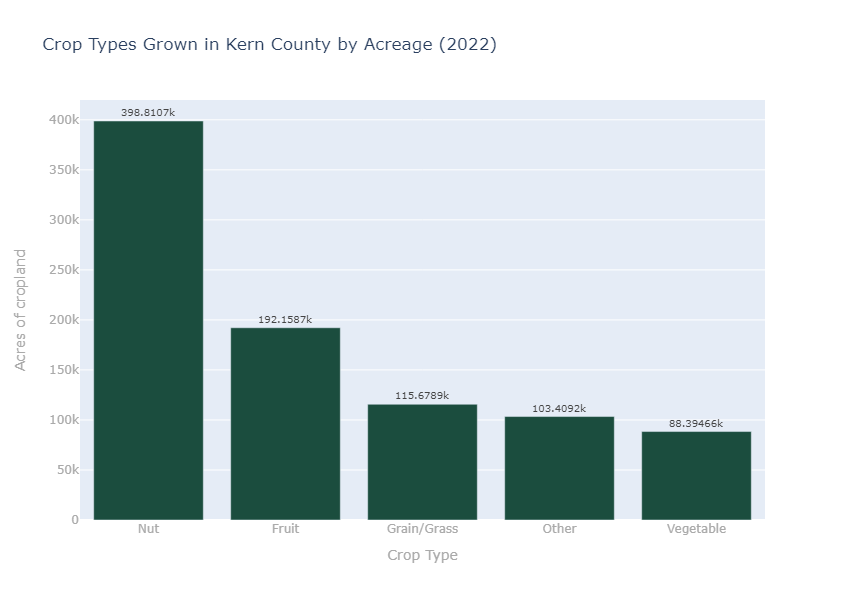

In [97]:
# prettified 
pio.templates.default = "plotly"
    # options: seaborn, simple_white, plotly, plotly_white, plotly_dark
    # presentation, xgridoff, ygridoff, gridon, none

fig = px.bar(grouparea,
        x='Group',
        y='Acreage',
        title="Crop Types Grown in Kern County by Acreage (2022)",
        text_auto = True,
        height=600,
        width=900,
        color_discrete_sequence =['#1b4d3e']*len(grouparea), # single color for all the bars
        labels={
                'Acreage': 'Acres of cropland',
                'Group': 'Crop Type',
        })

# bar label
fig.update_traces(textposition='outside',textfont_size=10,textfont_color='#444')

# axes labels
fig.update_yaxes(title_font_size=14,title_font_color='#aaa',tickfont_color='#aaa',tickfont_size=12)
fig.update_xaxes(title_font_size=14,title_font_color='#aaa',tickfont_color='#aaa',tickfont_size=12)

# show the figure
fig.show()

Looks like croplands cultivated for "nuts" make up about half of all agricultural land in the county.

In [98]:
crops2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 12178 entries, 0 to 12177
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Owner     12178 non-null  object  
 1   Crop      12178 non-null  object  
 2   Acres     12178 non-null  float64 
 3   City      12178 non-null  object  
 4   geometry  12178 non-null  geometry
 5   Group     12178 non-null  object  
dtypes: float64(1), geometry(1), object(4)
memory usage: 666.0+ KB


In [99]:
## checking projection
crops2.crs

<Derived Projected CRS: EPSG:2229>
Name: NAD83 / California zone 5 (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - California - counties Kern; Los Angeles; San Bernardino; San Luis Obispo; Santa Barbara; Ventura.
- bounds: (-121.42, 32.76, -114.12, 35.81)
Coordinate Operation:
- name: SPCS83 California zone 5 (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [100]:
## changing projection: prep for folium
crops2mercator = crops2.to_crs(3857)

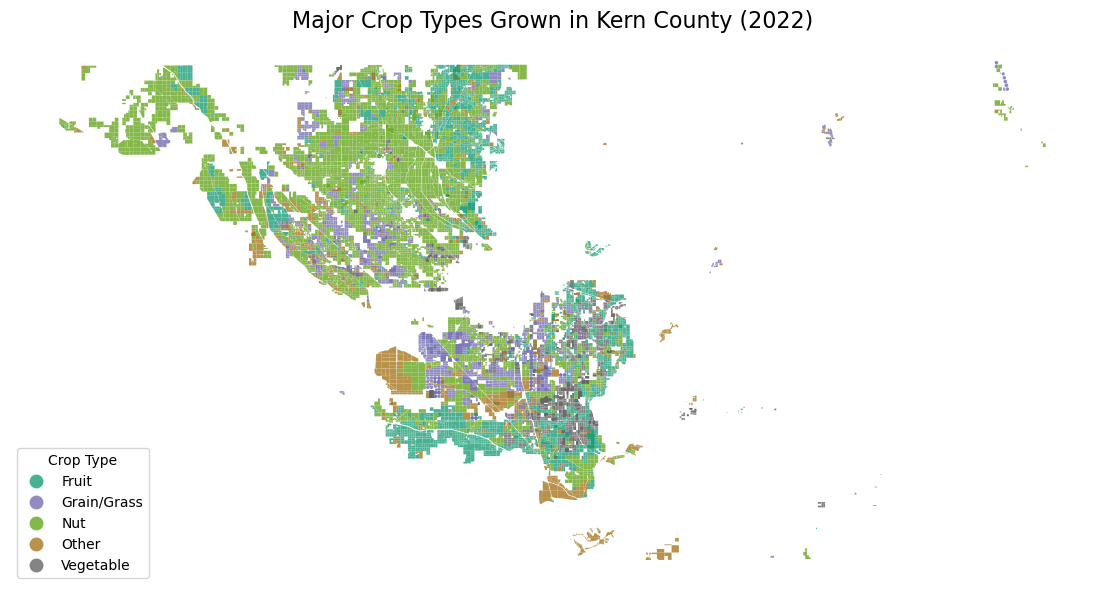

In [101]:
## plotting crop types grown
fig, ax=plt.subplots(figsize=(14,12))

crops2mercator.plot(ax=ax,
                    column='Group',
                    legend=True,
                    cmap='Dark2',
                    legend_kwds={'loc':'lower left'},
                    alpha=.8)

ax.axis('off')
ax.set_title("Major Crop Types Grown in Kern County (2022)",fontsize=16)
ax.get_legend().set_title("Crop Type")

In [102]:
## adding census tract borders
oilenv = gpd.read_file('OilCES4.geojson')

In [103]:
oilenv.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   TotPop19    151 non-null    int64   
 1   ApproxLoc   151 non-null    object  
 2   Tract       151 non-null    object  
 3   FIPS        151 non-null    object  
 4   Pesticide   151 non-null    float64 
 5   PesticideP  151 non-null    float64 
 6   Asthma      151 non-null    float64 
 7   AsthmaP     151 non-null    float64 
 8   Cardiovas   151 non-null    float64 
 9   CardiovasP  151 non-null    float64 
 10  LowBirtWt   151 non-null    float64 
 11  LowBirWP    151 non-null    float64 
 12  Shape_Leng  151 non-null    float64 
 13  Shape_Area  151 non-null    float64 
 14  Count       151 non-null    int64   
 15  geometry    151 non-null    geometry
dtypes: float64(10), geometry(1), int64(2), object(3)
memory usage: 19.0+ KB


In [104]:
## checking projection
oilenv.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

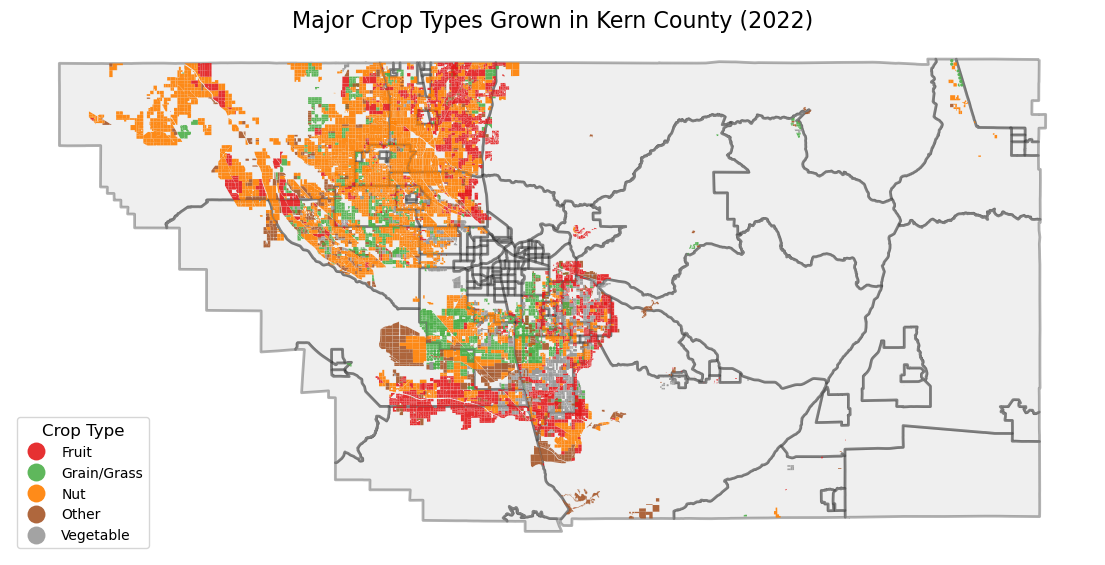

In [105]:
## map with census tract border overlays
fig, ax=plt.subplots(figsize=(14,12))

oilenv.plot(ax=ax,facecolor='#ccc',edgecolor='black',lw=2.0,alpha=.3)

crops2mercator.plot(ax=ax,
                    column='Group',
                    legend=True,
                    cmap='Set1',
                    legend_kwds={'loc':'lower left',
                                 'bbox_to_anchor':(0, 0), 'fmt':"{:.1f}",
                                 'markerscale':1.29, 
                                 'title_fontsize':'large', 
                                 'fontsize':'medium'},
                    alpha=.9)

ax.axis('off')
ax.set_title("Major Crop Types Grown in Kern County (2022)",fontsize=16)
ax.get_legend().set_title("Crop Type")

This is much better visually to get a sense of what's being grown where. The original map had 182 different crop types. Now we can see that most of the croplands cultivated for nuts are in the northwest, while grains/grasses and vegetables are cultivated in the southwest. There's also a section of fruit cropland that seems to be grown in the census tract that has almost half of all the oil wells in Kern County located on it. Yikes.

Now to overlay the oil well locations.

In [106]:
## opening oil wells gdf
kernwells = gpd.read_file('kernOGwells.geojson')

In [107]:
## checking projection
kernwells.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [108]:
## changing projections 3857 'EPSG:4326'
kernwells = kernwells.to_crs(3857)
oilenv = oilenv.to_crs(3857)
crops2mercator = crops2mercator.to_crs(3857)

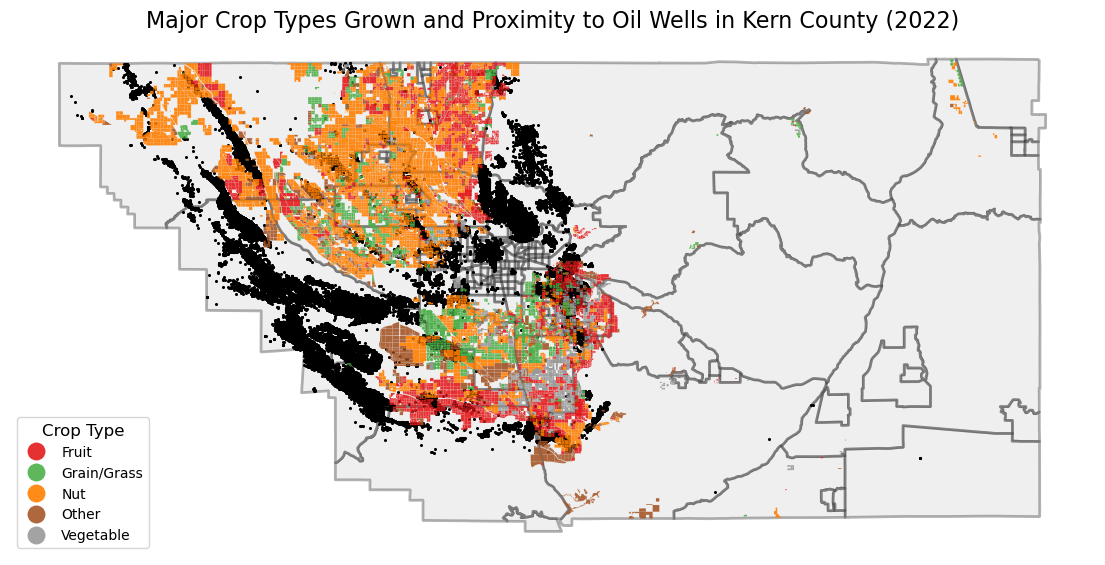

In [109]:
## map with census tract border + oil well overlays
fig, ax=plt.subplots(figsize=(14,12))

# census tract borders
oilenv.plot(ax=ax,facecolor='#ccc',edgecolor='black',lw=2.0,alpha=.3)

# oil wells
kernwells.plot(ax=ax,
           marker='.',
          markersize=6,
         color='black')

# crops
crops2mercator.plot(ax=ax,
                    column='Group',
                    legend=True,
                    cmap='Set1',
                    legend_kwds={'loc':'lower left',
                                 'bbox_to_anchor':(0, 0), 'fmt':"{:.1f}",
                                 'markerscale':1.29, 
                                 'title_fontsize':'large', 
                                 'fontsize':'medium'},
                    alpha=.9)

ax.axis('off')
ax.set_title("Major Crop Types Grown and Proximity to Oil Wells in Kern County (2022)",fontsize=16)
ax.get_legend().set_title("Crop Type")

This map shows all 90,000+ oil and gas wells that are not "cancelled" (which I dropped from the original dataset). Most of them are "idle", and only ~20,000 are "active". What if I wanted to create a version of this map that only shows the type of well, as a subset, overlaid onto the cropland by crop types?

In [110]:
## showing each type of well individually overlaid onto the crop types

# creating well status type list
status = kernwells['WellStatus'].unique().tolist()
status

['Idle', 'Active', 'Plugged', 'New', 'PluggedOnly', 'Unknown']

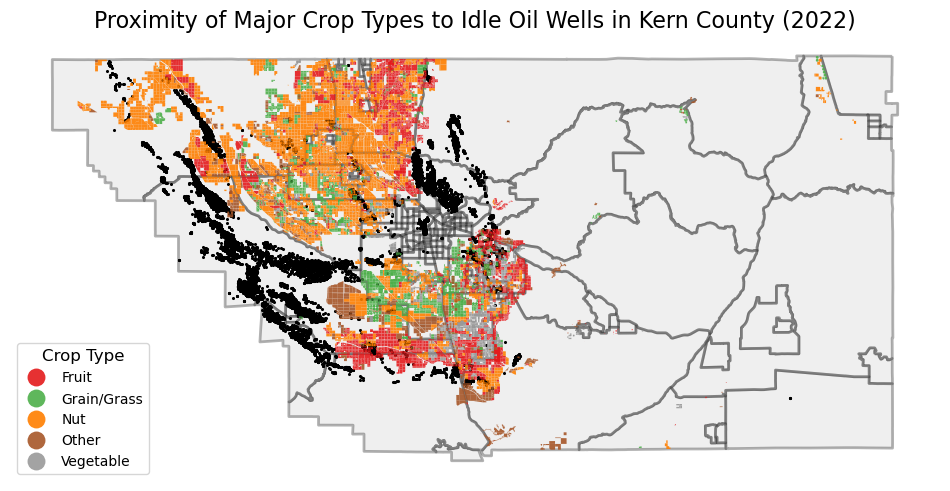

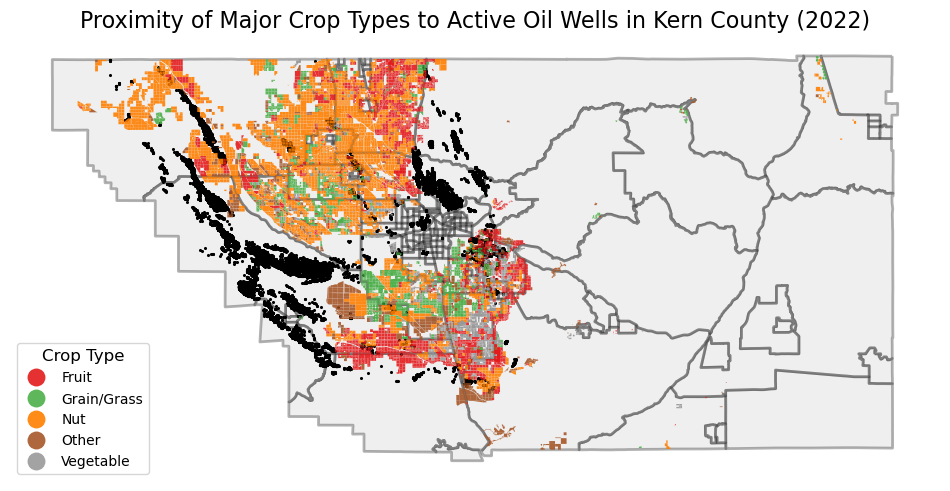

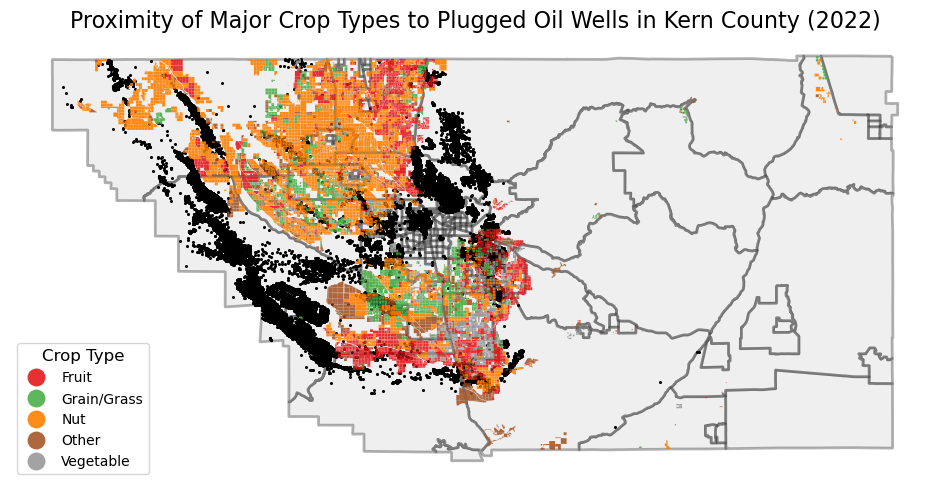

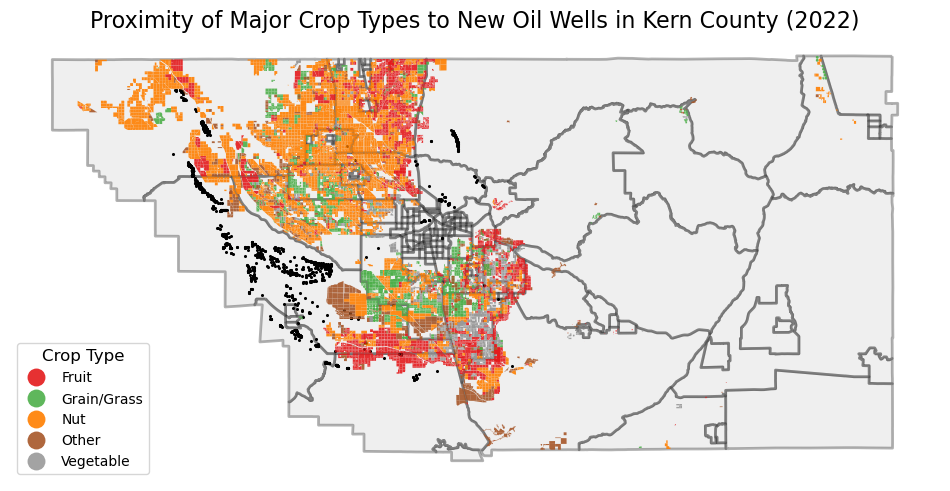

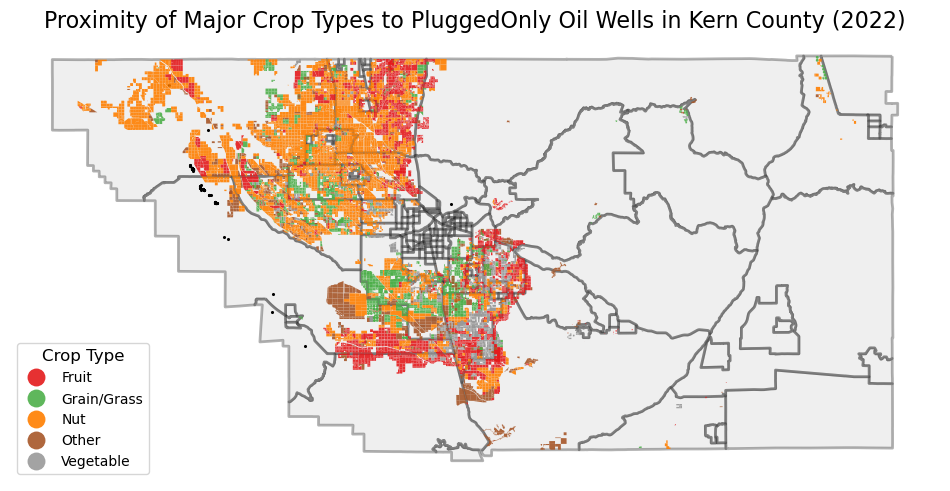

In [111]:
# loop
for type in status:
    fig, ax=plt.subplots(figsize=(12,10))

    # census tract borders
    oilenv.plot(ax=ax,facecolor='#ccc',edgecolor='black',lw=2.0,alpha=.3)

    # oil wells: specified by type
    kernwells[kernwells['WellStatus'] == type].plot(ax=ax,
           marker='.',
           markersize=6,
           color='black')

    # crops
    crops2mercator.plot(ax=ax,
                    column='Group',
                    legend=True,
                    cmap='Set1',
                    legend_kwds={'loc':'lower left',
                                 'bbox_to_anchor':(0, 0), 'fmt':"{:.1f}",
                                 'markerscale':1.29, 
                                 'title_fontsize':'large', 
                                 'fontsize':'medium'},
                    alpha=.9)

    ax.axis('off')
    ax.set_title("Proximity of Major Crop Types to"+ ' '+ type + ' ' +"Oil Wells in Kern County (2022)",fontsize=16)
    ax.get_legend().set_title("Crop Type")

It's hard to tell at this scale, but all the wells are clustered in the same locations/patterns for the most part, so all the cropland no matter the crop seems to be equally exposed to each type of well by status. 

What if I wanted to see how the different crop types compare in their proximity to only the "Active" wells?

In [112]:
## showing each crop type individually overlaid onto "active" wells

# creating crop type list
ctype = crops2mercator['Group'].unique().tolist()
ctype

['Other', 'Nut', 'Fruit', 'Grain/Grass', 'Vegetable']

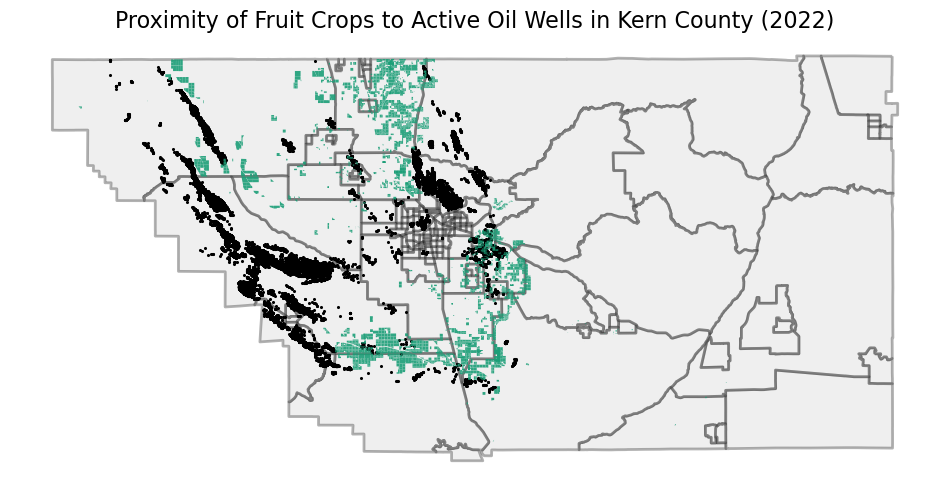

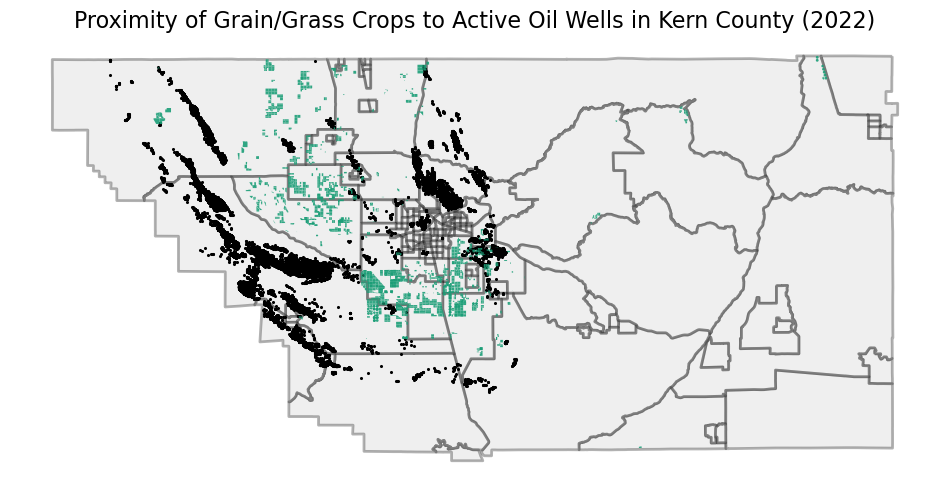

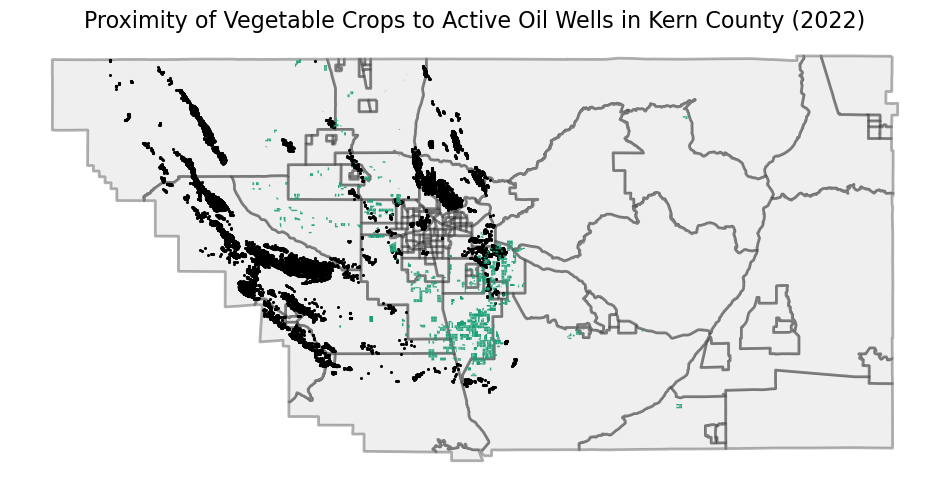

In [113]:
# loop
for type in ctype:
    fig, ax=plt.subplots(figsize=(12,10))

    # census tract borders
    oilenv.plot(ax=ax,facecolor='#ccc',edgecolor='black',lw=2.0,alpha=.3)

    # oil wells: specified by type
    kernwells[kernwells['WellStatus'] == 'Active'].plot(ax=ax,
           marker='.',
           markersize=6,
           color='black')

    # crops
    crops2mercator[crops2mercator['Group'] == type].plot(ax=ax,
                    column='Group',
                    legend=False,
                    cmap='Dark2',
                    alpha=.9)

    ax.axis('off')
    ax.set_title("Proximity of"+' '+ type + ' '+ "Crops to Active Oil Wells in Kern County (2022)",fontsize=16)

I also want to look at where organic versus non-organic crops are grown.

In [114]:
## adding "organic/nonorganic" dummy variable to crops 2 gdf
crops2mercator['Method'] = 'Conventional'
crops2mercator.loc[crops2mercator['Crop'].str.contains("ORGANIC"), 'Method'] = 'Organic'

In [115]:
crops2mercator.sample(10)

Owner           Crop  Acres            City  \
9741         TASTEFUL SELECTIONS LLC     WATERMELON  116.0           ARVIN   
9818   WONDERFUL ORCHARDS - BELRIDGE      PISTACHIO   59.0      MCKITTRICK   
3197                PETRISSANS DAIRY    OAT FOR/FOD   25.0  BAKERSFIELD CA   
9133    LOUIS PANDOL (RANCH 23 & 63)      SAFFLOWER    4.0          DELANO   
6050               WESTERN SKY DAIRY  WHEAT FOR/FOD   75.0     BAKERSFIELD   
8156         VAL-MAR FARMS- ORGANICS  ONION DRY ETC   23.0     BAKERSFIELD   
10979                    H & H FARMS         POTATO   40.0           ARVIN   
6011             CLINTON SHICK FARMS         ALMOND   73.0      MC FARLAND   
255           ORINDA ORANGE ORCHARDS         ALMOND   76.2     BAKERSFIELD   
9665         KIRSCHENMAN ENTERPRISES         TOMATO   75.0          EDISON   

                                                geometry        Group  \
9741   POLYGON ((-13233397.617 4181418.571, -13231892...        Fruit   
9818   POLYGON ((-13320812.203 4227474.745, -13320809...          Nut   
3197   POLYGON ((-13254672.328 4188290.776, -13254350...  Grain/Grass   
9133   POLYGON ((-13267233.433 4260544.943, -13267021...    Vegetable   
6050   POLYGON ((-13266219.800 4183107.085, -13265240...  Grain/Grass   
8156   POLYGON ((-13241398.942 4174063.355, -13241288...    Vegetable   
10979  POLYGON ((-13220228.373 4207334.466, -13220225...    Vegetable   
6011   POLYGON ((-13267814.669 4251957.456, -13267813...          Nut   
255    POLYGON ((-13268861.311 4264854.800, -13268382...          Nut   
9665   POLYGON ((-13230968.251 4197256.538, -13230496...    Vegetable   

             Method  
9741   Conventional  
9818   Conventional  
3197   Conventional  
9133   Conventional  
6050   Conventional  
8156   Conventional  
10979  Conventional  
6011   Conventional  
255    Conventional  
9665   Conventional

Now to save this amended cropland data into a geojson for easy access later before moving onto mapping organic vs. conventional cropland.

In [162]:
## saving amended cropland gdf as a geojson
crops2mercator.to_file("kerncropland.geojson", driver='GeoJSON')

In [116]:
## table showing acreage by method
method = crops2mercator.groupby('Method')['Acres'].sum().reset_index(name='Acreage')
method

Method    Acreage
0  Conventional  876051.98
1       Organic   22400.30

In [117]:
print(876051.98/22400.30)

39.1089396124159


Conventionally cultivated crops make up more than 39 times the land cultivated compared to organically cultivated crops.

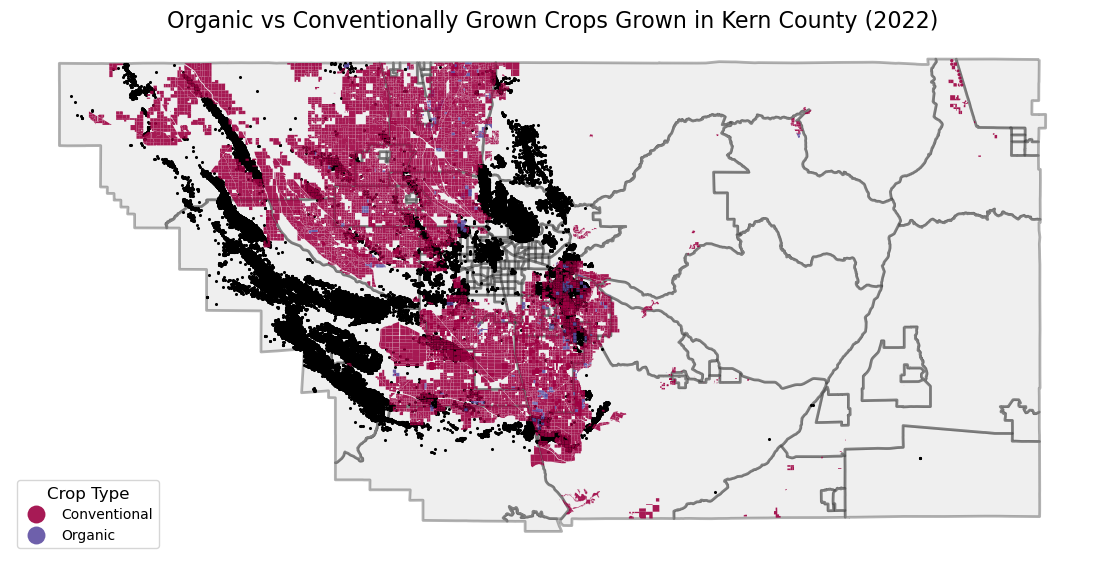

In [118]:
## mapping cropland by method
fig, ax=plt.subplots(figsize=(14,12))

# census tract borders
oilenv.plot(ax=ax,facecolor='#ccc',edgecolor='black',lw=2.0,alpha=.3)

# oil wells
kernwells.plot(ax=ax,
           marker='.',
           markersize=6,
           color='black')

# crops
crops2mercator.plot(ax=ax,
                    column='Method',
                    legend=True,
                    cmap='Spectral',
                    legend_kwds={'loc':'lower left',
                                 'bbox_to_anchor':(0, 0), 'fmt':"{:.1f}",
                                 'markerscale':1.29, 
                                 'title_fontsize':'large', 
                                 'fontsize':'medium'},
                    alpha=.9)

ax.axis('off')
ax.set_title("Organic vs Conventionally Grown Crops Grown in Kern County (2022)",fontsize=16)
ax.get_legend().set_title("Crop Type")

## Mapping Waterways and Water Infrasctructure in Kern County

As some of the maps in [last week's map](https://nbviewer.org/github/ngmelo/up221-melody/blob/main/Week%205/OilgaswellsandhealthKern.html) indicated, most of the extraction/production activities are happening in the western part of the County while all the worst health outcomes are concentrated to the east. As mentioned during the midterm presentation, some of this has to do with where most of the residents live -- in the eastern part of the County.

But some of it may have to do with how the natural waterways and the constructed water infrastructure in the County are carrying the waste/byproducts of oil extraction and agricultural operations in the concentrated in the west to the other parts of the County. So I'll be mapping select waterways and water infrastructure to get a sense of how this might be happening. 

There doesn't seem to be any data on Kern County in Open Street Maps, so I'll need to draw from other sources.

In [119]:
## loading data on waterways and infrastructure downloaded from UC Berkeley
watershed = gpd.read_file('berkeley-s74962-geojson.json')

In [120]:
watershed.shape

(108, 5)

In [121]:
watershed.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        108 non-null    object  
 1   NAME      108 non-null    object  
 2   TYPE      108 non-null    object  
 3   BURIED    108 non-null    object  
 4   geometry  108 non-null    geometry
dtypes: geometry(1), object(4)
memory usage: 4.3+ KB


In [122]:
watershed.head()

id                   NAME      TYPE BURIED  \
0  s74962.1  South Fork Kern River     river      N   
1  s74962.2    California Aqueduct  aqueduct      N   
2  s74962.3   Los Angeles Aqueduct  aqueduct      N   
3  s74962.4        Hart Lake inlet     canal      Y   
4  s74962.5        Hart Lake inlet     canal      Y   

                                            geometry  
0  MULTIPOLYGON (((-118.19716 35.77556, -118.1975...  
1  MULTIPOLYGON (((-119.50352 35.36070, -119.5027...  
2  MULTIPOLYGON (((-117.91763 35.59624, -117.9180...  
3  MULTIPOLYGON (((-118.90459 35.44534, -118.9046...  
4  MULTIPOLYGON (((-118.90345 35.44494, -118.9034...

OK -- let's see what this looks like mapped.

In [123]:
## checking projection
watershed.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot: >

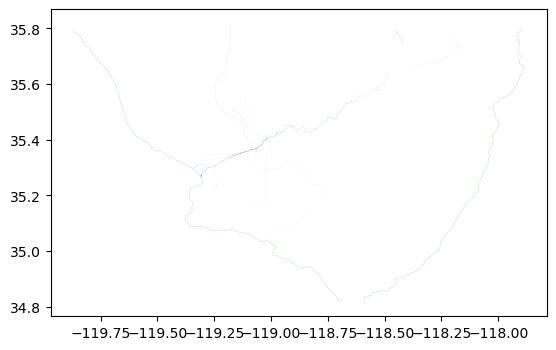

In [124]:
watershed.plot()

Difficult to tell what I'm looking at. Let's try adding the census tract boundaries or a basemap to this.

In [125]:
## setting projections, b/c gdfs are misaligned
watershed = watershed.to_crs("EPSG:4326")
oilenv = oilenv.to_crs("EPSG:4326")

<AxesSubplot: >

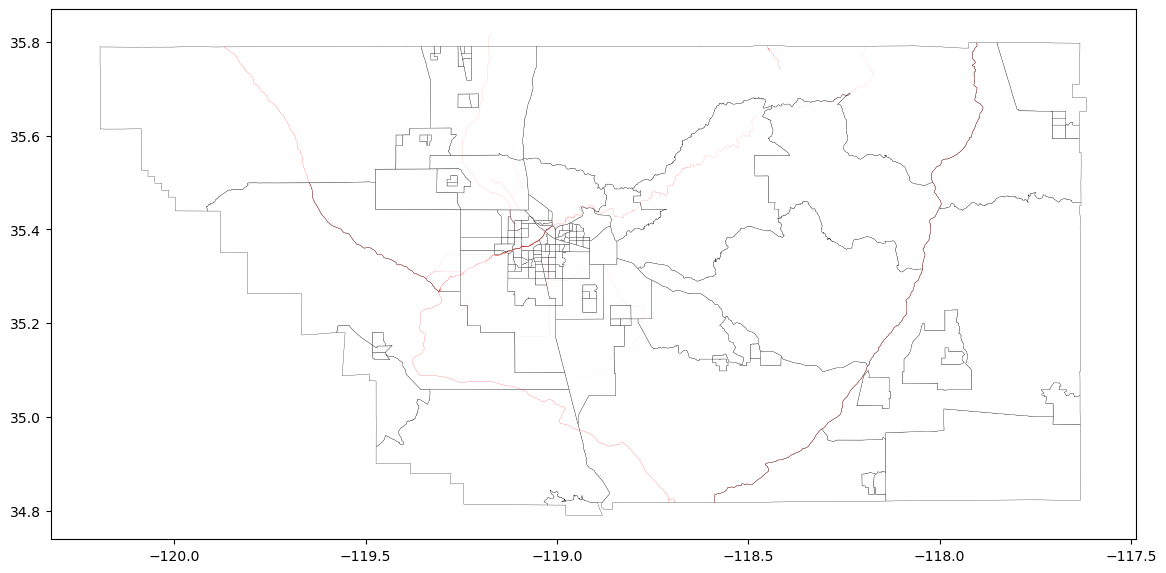

In [126]:
## Checking whether dataframes align
fig,ax = plt.subplots(figsize=(14,12))
oilenv.plot(ax=ax,facecolor='white',edgecolor='black',lw=0.2)
watershed.plot(ax=ax,linestyle='solid',linewidth=10,color='red',alpha=0.9)
## find a way to turn the names into labels on the plot???

It's difficult to see on this plot, but the lines representing the rivers, canals, other waterways/infrastructure are definitely there. Need to figure out how to make them more visible later.

I also need to try to get watershed boundary data and other more descriptive waterways data (which I have downloaded from USGS as a huge .gdb file and am having trouble figuring out how to open and read in Python). For next week.